# Key points in filter design:


* **Symmetrical Impulse response: $h[n] = h[M-n-1]$**
    * Ensures ***linear phase response*** in passband: $\angle H(\hat{\omega}) = -\frac{M-1}{2}\cdot \hat{\omega}$
    * All frequency components time-shifted equally $\rightarrow$ signal shape is preserved

* Odd numbered filter lenght $M$ is often desirable:
    * The ***group delay*** $D(\hat{\omega}) = - \frac{d \angle H(\hat{\omega})}{d\hat{\omega}}=\frac{M-1}{2}$ is an integer.
    * All frequency components being delayed by an integer number of samples makes it easy to align differently filtered signals with $0$ relative phase difference.

## Example:
* Find a *general expression* frequency response $H(\hat{\omega})$ for a $M=5$-tap FIR filter with symmetrical impulse response $h[n] = h[4-n]$:

* Can we infer a further generalization which holds for *any* odd-length filter?

# FIR filter general form of frequency response

$$\large H(\hat{\omega}) = \left( h\left[D \right] + \sum_{n=1}^{D} h\left[n + D\right] \cdot \cos \left(n \cdot \hat{\omega} \right) \right) \cdot e^{-j\hat{\omega} \cdot D}, \ \ \ D = \frac{M-1}{2}$$

* Not dissimilar to fourier series reconstruction, except we're now constructing a continuous *frequency-domain* function from discrete *time-domain* samples $h[n]$

#### Key insight:
* FIR filter design is an ***optimization problem***.
    * Find the vector $\vec{h} = \left[h[0], h[1], \ldots , h[M-1] \right]^T$ which minimizes som error function e.g. $E(\vec{h})$
    * Gradient descent can be used

#  [consider demo]

# 'Optimal' FIR-filters

* The Remez Exchange algorithm (aka. Parks-McClellan) is an algorithm which uses optimization techniques to find the optimal FIR filter $h[n]$.
    * 
* Included in the `scipy.signal` module through the function [`remez()`](https://docs.scipy.org/doc/scipy-1.8.0/html-scipyorg/reference/generated/scipy.signal.remez.html)
* Vi bruker en rekke arrayer til å spesifisere *nøyaktig* hvordan vi ønsker at filteret skal være.
* Filteret returnerer det optimale filteret med gitt filterorden som er mest mulig likt kravene:
    * Alle de små "toppene" i stoppbåndet vil være nøyaktig like høye.
    * Passbånd rippel er like stor over hele passbåndet
    * Gir et filter med litt lavere filterorden enn et filter designet med vindusmetoden gitt samme krav til ytelse.


# Lavpassfilter

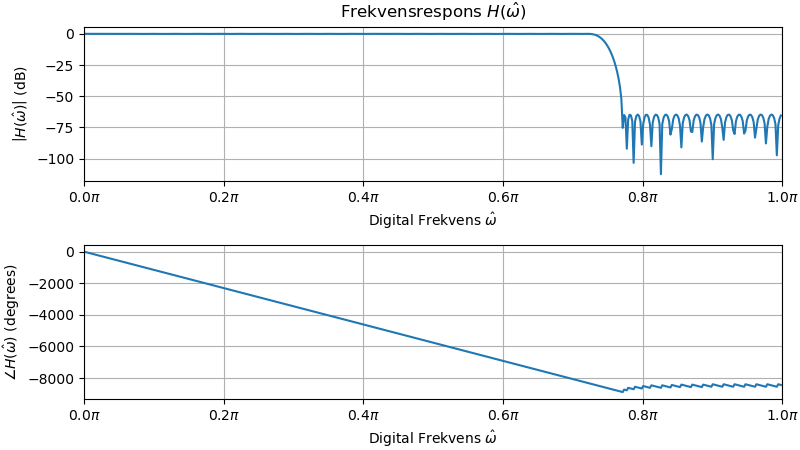

In [78]:
fs = 22050.0       # Sample rate, Hz
cutoff = 8000.0    # Desired cutoff frequency, Hz
trans_width = 500  # Width of transition from pass band to stop band, Hz
numtaps = 129      # Size of the FIR filter.

hn = sig.remez(numtaps,                                    # Lengde på impulsrespons = filterorden + 1
               [0, cutoff, cutoff + trans_width, 0.5*fs],  # Alle 'kantfrekvensene' etter tur 
               [1, 0],                                     # Ønsket filtergain i de ulike båndene
               fs=fs,                                      # Samplingsfrekvens
               weight=[1, 10],                             # Vi "bryr oss" 10 ganger mer om demping i 
                                                           # stoppbånd enn rippel/variasjoner i passbånd
              )

displayFrequencyResponse(b=hn)

# Båndbegrenset derivasjonsfilter

/tmp/ipykernel_337/3625525585.py:6: DeprecationWarning: 'remez' keyword argument 'Hz' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  hn = sig.remez(numtaps,                                    # Lengde på impulsrespons = filterorden + 1


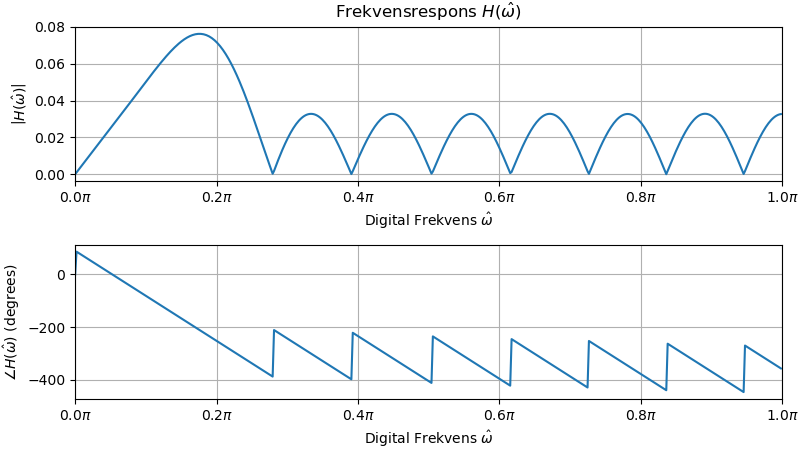

In [76]:
fs = 8000         # Sample rate, Hz
cutoff = 500     # Desired cutoff frequency, Hz
trans_width = 500 # Width of transition from pass band to stop band, Hz
numtaps = 20      # Size of the FIR filter.

hn = sig.remez(numtaps,                                    # Lengde på impulsrespons = filterorden + 1
               [0, cutoff, cutoff + trans_width, 0.5*fs],  # Alle 'kantfrekvensene' etter tur 
               [1, 0],                                     # Ønsket filtergain i de ulike båndene
               Hz=fs,                                      # Samplingsfrekvens
               weight=[10, 1],                             # Vi "bryr oss" 10 ganger mer om rippel i passbånd 
                                                           # enn demping i stoppbånd
               type='differentiator'
              )

displayFrequencyResponse(b=hn, mag='lin')